# Stromerzeugung in Deutschland in 2024

### Vorgehen:

1. Hypothesen aufstellen
   1. Am Tag gibt es mehr Sonnenenergie als Nachts
   2. Solar erzeugt viel Strom, wenn Wind wenig Strom erzeugt
   3. Die Zeitumstellung hat einen Einfluss auf die Energieerzeugung (Zusatz)
   4. Im Jahr liefern die erneuerbaren Energien mehr Strom als die konventionellen Energien
   5. Die Energieerzeugung durch Müll ist die meiste Zeit konstant
   6. Kohle und Gas werden vor allem dann benötigt, wenn man eine hohe Last hat
   7. Wenn viel Energie aus erneuerbaren Energiequellen gewonnen wird, wird weniger Energie konventionell gewonnen
   8. In den Dämmerungen wird mehr Windstrom produziert, als in der Mittags- und Mitternachts-zeit (Zusatz)
   9. Weitere
2. Hypothesen nacheinander prüfen

### Imports

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [28]:
energy_data = pd.read_csv("./data/energy_chart_Deutschland_2024.csv", encoding='latin1', sep=',')

energy_data = energy_data[1:]

for category in energy_data.keys()[1:]:
    energy_data[category] = energy_data[category].astype('float')
energy_data['Datum (MEZ)'] = pd.to_datetime(energy_data['Datum (MEZ)'], utc=True) + pd.DateOffset(hours=1)

In [29]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30562 entries, 1 to 30562
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Datum (MEZ)     30562 non-null  datetime64[ns, UTC]
 1   Laufwasser      30562 non-null  float64            
 2   Biomasse        30562 non-null  float64            
 3   Braunkohle      30562 non-null  float64            
 4   Steinkohle      30562 non-null  float64            
 5   Öl              30562 non-null  float64            
 6   Erdgas          30562 non-null  float64            
 7   Geothermie      30482 non-null  float64            
 8   Speicherwasser  30562 non-null  float64            
 9   Pumpspeicher    30562 non-null  float64            
 10  Andere          30474 non-null  float64            
 11  Müll            30562 non-null  float64            
 12  Wind Offshore   30562 non-null  float64            
 13  Wind Onshore    30562 non-null 

In [30]:
energy_data.describe()

,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last
count,30562.000000,30562.000000,30562.000000,30562.000000,30562.000000,30562.000000,30482.000000,30562.000000,30562.000000,30474.000000,30562.000000,30562.000000,30562.000000,30562.000000,30561.000000
mean,2426.938564,4158.563864,7926.534828,2622.557922,370.715846,5209.983172,17.625254,142.407774,1266.177217,159.679153,1052.003187,2827.030826,11665.830207,7774.229281,52234.339514
std,314.757939,326.918942,3248.433067,1849.452298,90.279029,2793.181931,3.732722,131.476631,1667.198180,49.238767,168.749259,1884.404468,9254.845105,11162.603360,9141.370843
min,1154.000000,3302.200000,2501.800000,231.600000,37.000000,1330.800000,5.700000,1.100000,0.000000,111.100000,354.500000,0.000000,44.200000,0.000000,31900.800000
25%,2191.400000,3926.500000,4986.025000,1224.425000,333.500000,2952.750000,15.400000,46.200000,96.400000,113.500000,945.900000,1143.325000,4581.150000,2.000000,44632.700000
50%,2423.450000,4179.400000,8023.150000,2059.750000,367.800000,4574.750000,16.400000,93.200000,416.900000,148.400000,1092.700000,2618.500000,9171.950000,482.250000,52135.200000
75%,2668.300000,4392.000000,10471.350000,3619.800000,377.475000,6743.675000,21.100000,194.700000,1904.525000,189.800000,1172.675000,4378.950000,16434.300000,13713.275000,59466.000000
max,3180.300000,5013.700000,17158.300000,10022.000000,1191.100000,15355.000000,25.900000,680.800000,7445.200000,324.800000,1366.600000,7389.300000,45941.000000,46942.000000,75766.700000


<Axes: >

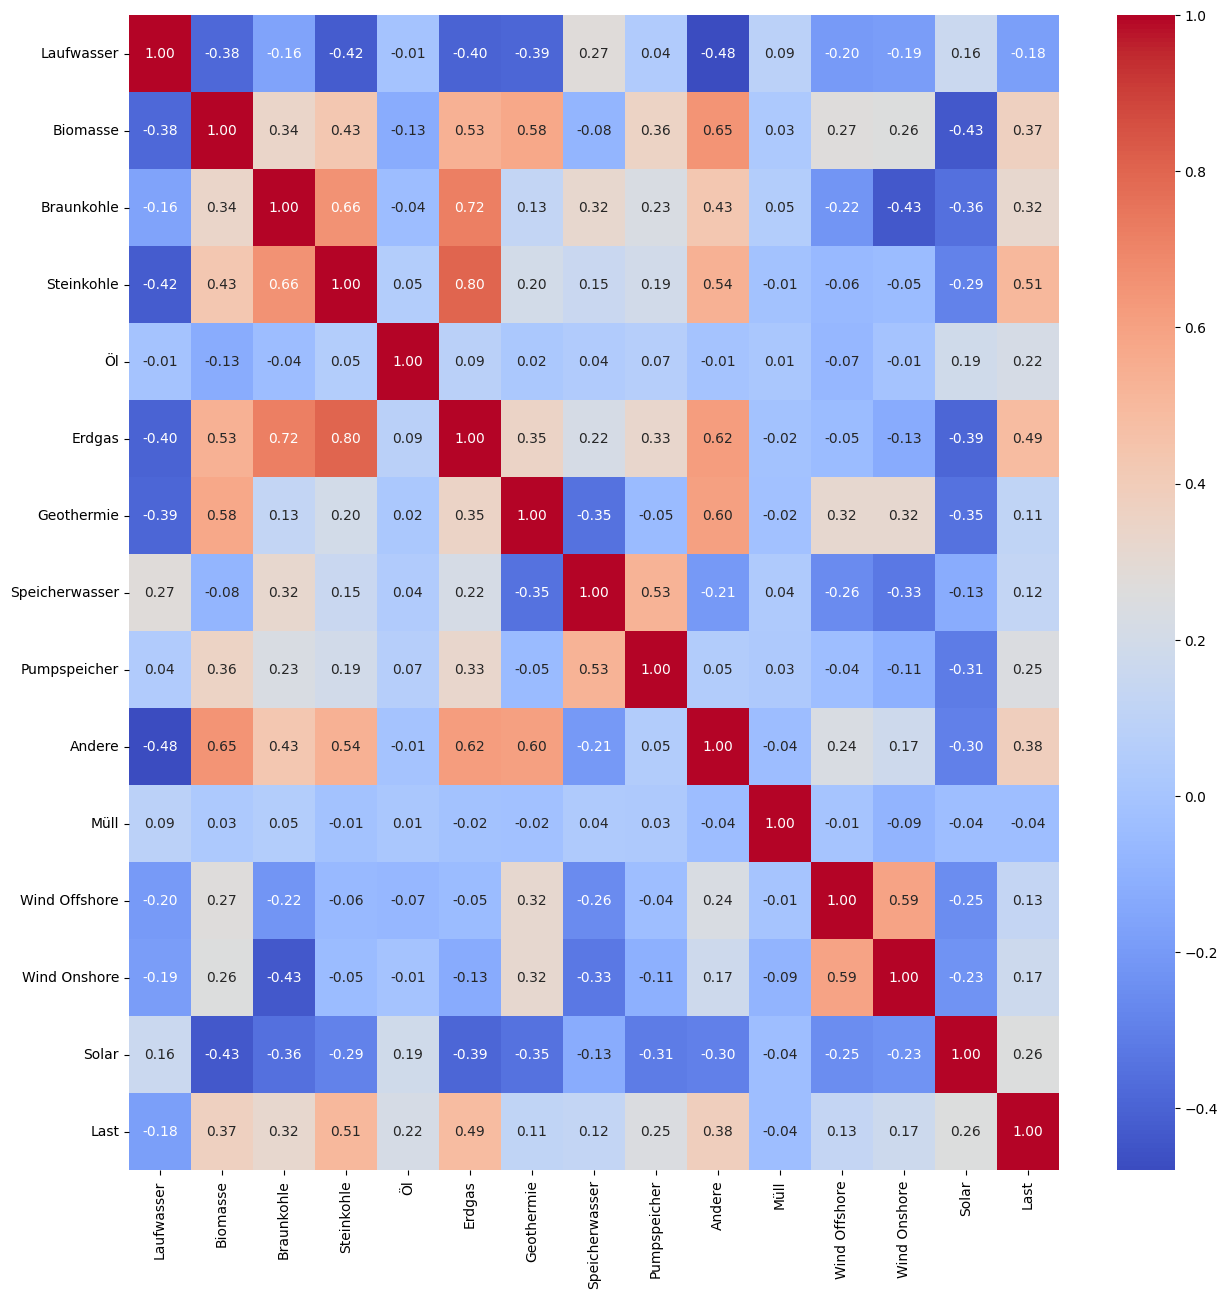

In [31]:
energy_data_num = energy_data.corr(numeric_only=True)

plt.figure(figsize=(15,15))
sns.heatmap(energy_data_num, cmap="coolwarm", annot=True, fmt="0.2f")

# Resampling des Dataframes von 15min abschnitten auf Wochen um erstmal eine grobe Übersicht zu bekommen

In [32]:
energy_data = energy_data.set_index("Datum (MEZ)")
energy_data.head(5)

,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last
Datum (MEZ),,,,,,,,,,,,,,,
2024-01-01 00:00:00+00:00,2223.2,4180.6,3314.0,1566.0,398.4,2680.2,22.9,86.4,791.4,152.4,837.2,5838.9,29367.0,2.4,40592.6
2024-01-01 00:15:00+00:00,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,99.7,430.3,152.4,844.0,5747.9,29028.0,2.4,40301.1
2024-01-01 00:30:00+00:00,2218.7,4185.5,3340.2,1567.0,397.8,2516.7,22.9,90.0,470.4,152.4,836.0,5618.1,29035.8,1.6,40171.7
2024-01-01 00:45:00+00:00,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,82.6,358.3,152.4,813.6,5512.0,29440.9,1.7,39615.0
2024-01-01 01:00:00+00:00,2216.1,4166.3,3322.8,1572.5,398.0,2504.5,22.6,82.8,505.9,152.4,813.2,5463.9,29501.6,2.4,39336.8


In [33]:
weekly_mean_df = energy_data.resample("W").mean()
weekly_min_df = energy_data.resample("W").min()
weekly_max_df = energy_data.resample("W").max()

In [34]:
weekly_df = energy_data.resample('W').agg(['mean', 'min', 'max'])
weekly_df.columns = ['_'.join(col).strip() for col in weekly_df.columns]
weekly_df.head(5)

,Laufwasser_mean,Laufwasser_min,Laufwasser_max,Biomasse_mean,Biomasse_min,Biomasse_max,Braunkohle_mean,Braunkohle_min,Braunkohle_max,Steinkohle_mean,...,Wind Offshore_max,Wind Onshore_mean,Wind Onshore_min,Wind Onshore_max,Solar_mean,Solar_min,Solar_max,Last_mean,Last_min,Last_max
Datum (MEZ),,,,,,,,,,,,,,,,,,,,,
2024-01-07 00:00:00+00:00,2191.699405,1154.0,2424.0,4373.359821,4083.4,4726.9,7360.295982,3295.9,12410.6,2332.676190,...,6437.3,22380.229613,5672.8,42850.5,936.530506,1.5,7923.0,52811.657440,36592.6,65872.4
2024-01-14 00:00:00+00:00,2293.784821,2004.4,2487.9,4481.776339,4189.8,4825.7,12631.270387,6808.2,15789.4,6895.946280,...,6564.9,12257.950893,2036.3,28538.3,1857.787202,1.4,15615.5,61640.776042,45332.1,72802.6
2024-01-21 00:00:00+00:00,2167.367411,1916.1,2422.7,4477.871726,4189.8,4818.4,11236.998958,3626.8,15975.5,5479.241369,...,6513.3,19597.047768,3430.2,38212.4,1335.627530,1.5,12536.1,62999.312351,46390.6,75766.7
2024-01-28 00:00:00+00:00,2376.558780,1850.8,2685.1,4429.521577,4096.4,4780.6,5072.276935,3290.9,8605.9,3665.138839,...,6245.3,29218.077827,7325.7,44391.0,2683.066369,1.6,25493.2,59078.982292,40008.5,73104.2
2024-02-04 00:00:00+00:00,2354.463988,2124.6,2501.7,4457.281399,4149.5,4818.5,6716.299107,3368.6,10843.2,3824.050595,...,6806.6,26043.531994,5218.5,40746.7,2542.674107,1.1,23217.3,58763.772024,43247.5,72138.6


### Solarstromerzeugung min, mean und max wöchentlich

In [35]:
px.line(weekly_df, y=["Solar_mean", "Solar_min", "Solar_max"], labels={"value": "Stromproduktion in MW"})

In [36]:
hourly_df = energy_data.resample("h").agg(["mean", "min", "max"])
hourly_df.columns = ['_'.join(col).strip() for col in hourly_df.columns]
hourly_df = hourly_df.reset_index()
hourly_df.head(5)

,Datum (MEZ),Laufwasser_mean,Laufwasser_min,Laufwasser_max,Biomasse_mean,Biomasse_min,Biomasse_max,Braunkohle_mean,Braunkohle_min,Braunkohle_max,...,Wind Offshore_max,Wind Onshore_mean,Wind Onshore_min,Wind Onshore_max,Solar_mean,Solar_min,Solar_max,Last_mean,Last_min,Last_max
0,2024-01-01 00:00:00+00:00,2220.225,2216.7,2223.2,4184.150,4180.6,4187.7,3352.500,3314.0,3436.9,...,5838.9,29217.925,29028.0,29440.9,2.025,1.6,2.4,40170.100,39615.0,40592.6
1,2024-01-01 01:00:00+00:00,2218.450,2216.1,2222.0,4157.200,4148.6,4166.3,3333.575,3322.8,3348.9,...,5463.9,29335.150,29110.8,29501.6,1.875,1.7,2.4,38818.125,38328.8,39336.8
2,2024-01-01 02:00:00+00:00,2229.175,2223.6,2232.8,4142.925,4136.7,4153.2,3334.550,3330.2,3342.1,...,5360.1,29316.350,29271.8,29388.6,1.825,1.6,2.4,37847.550,37285.7,38408.0
3,2024-01-01 03:00:00+00:00,2224.950,2220.8,2228.8,4120.125,4116.6,4126.4,3353.625,3342.6,3365.8,...,4763.0,28860.025,28673.7,29150.7,1.975,1.6,2.4,37123.225,37031.1,37307.9
4,2024-01-01 04:00:00+00:00,2212.475,2210.2,2215.7,4124.925,4118.9,4133.6,3354.325,3352.2,3357.5,...,4579.0,28953.975,28736.3,29213.9,1.625,1.6,1.7,36753.525,36612.8,36984.6


In [37]:
june_df = hourly_df[hourly_df["Datum (MEZ)"].dt.month == 6]

px.line(june_df, y=["Solar_mean"], x="Datum (MEZ)", title="Solarstromerzeugung im Juni", labels={"value": "Stromproduktion in MW"})
